Training the model using the fer2013 emotions dataset

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 conv2d_14 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                  

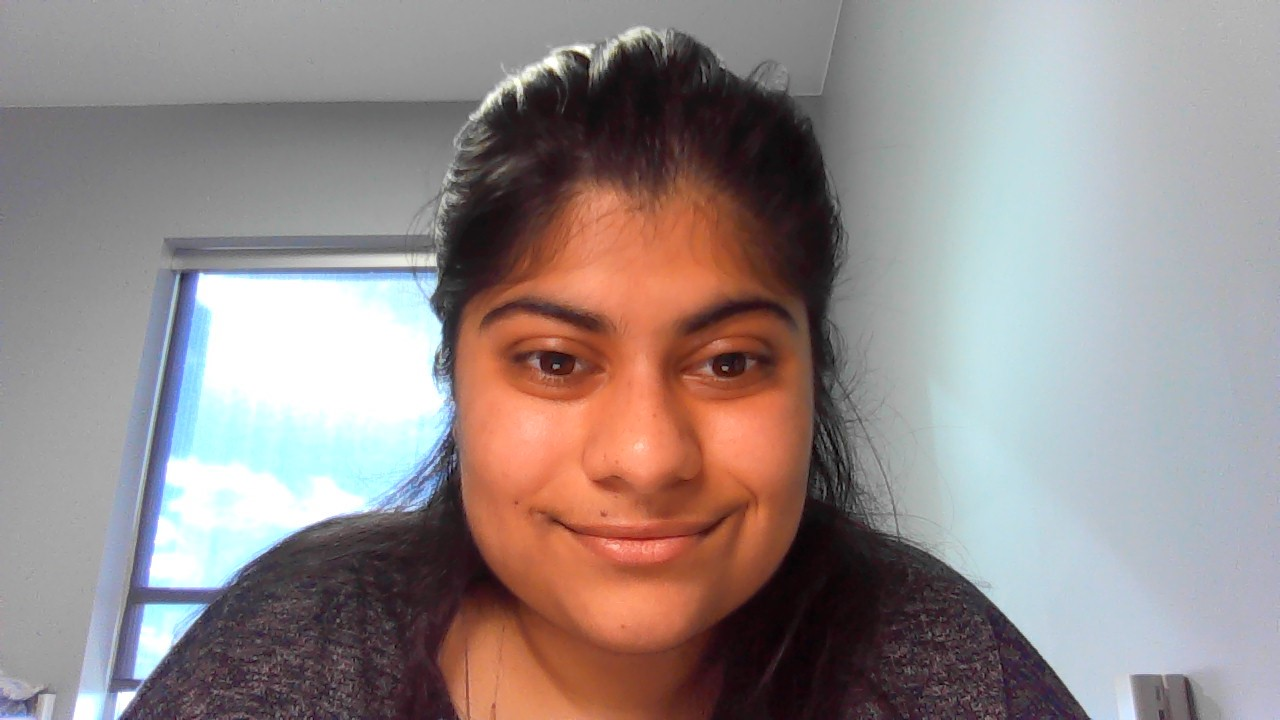



2 = fear


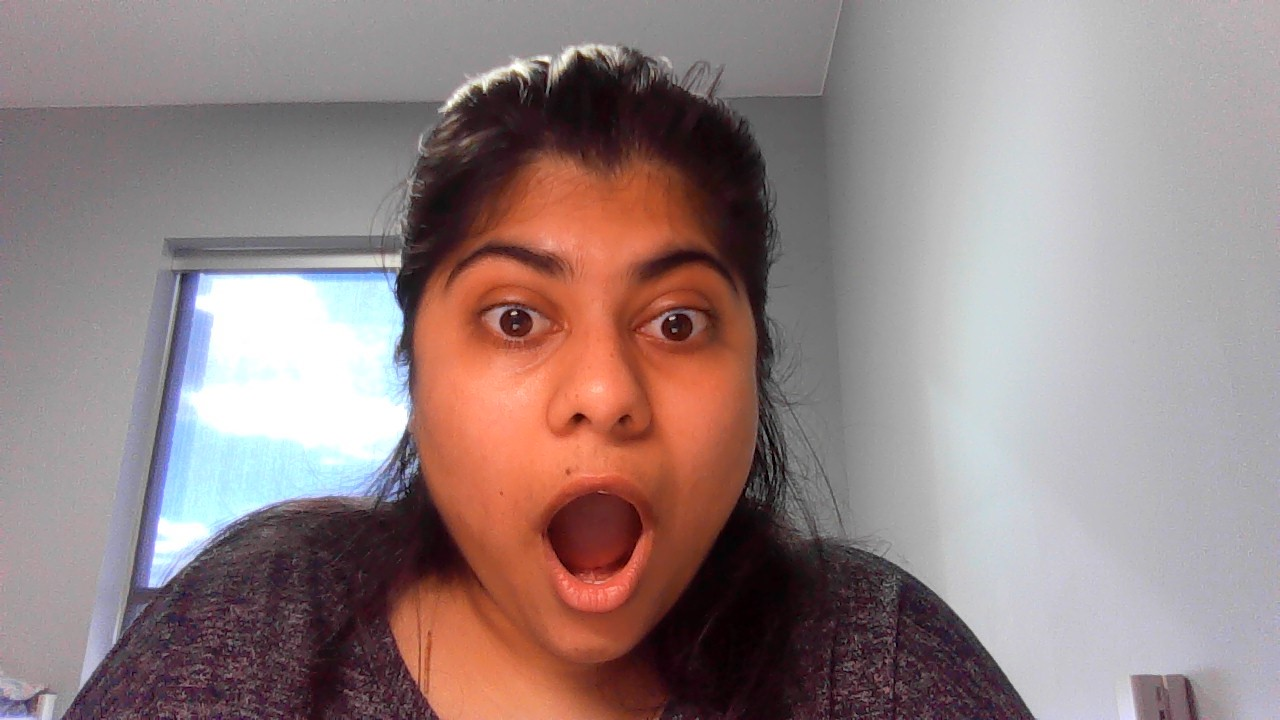



3 = happy


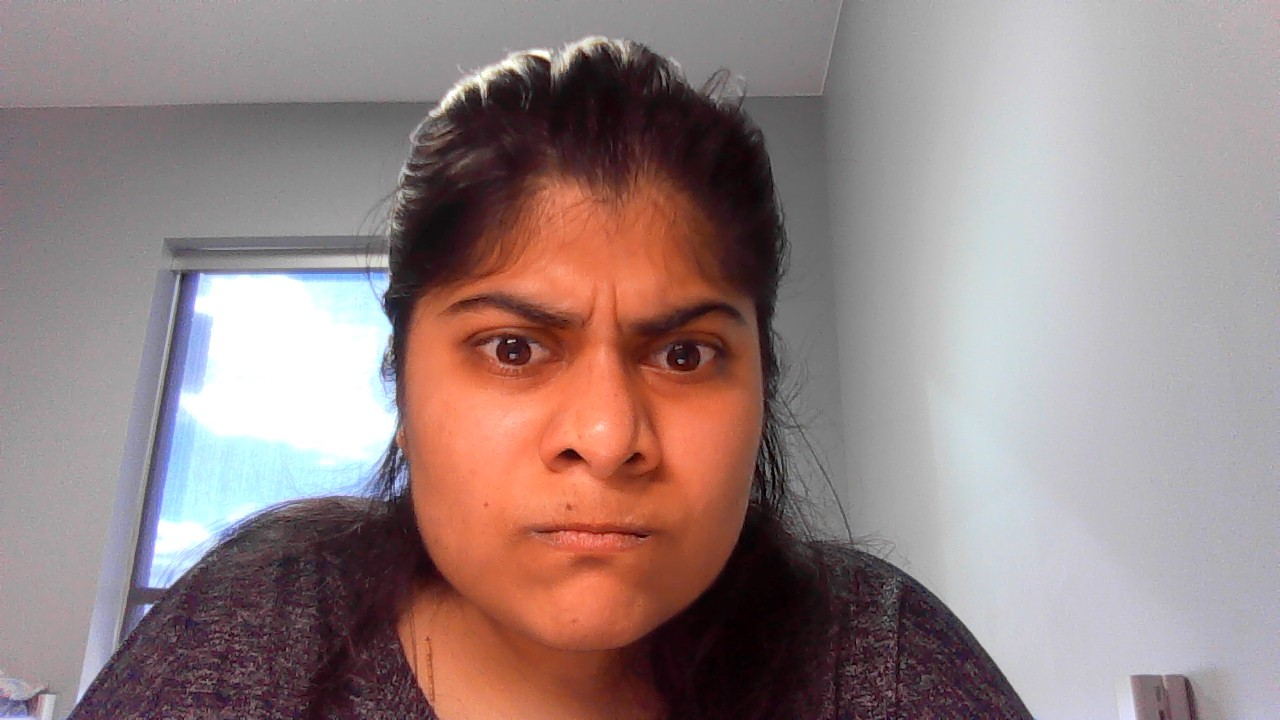



3 = happy


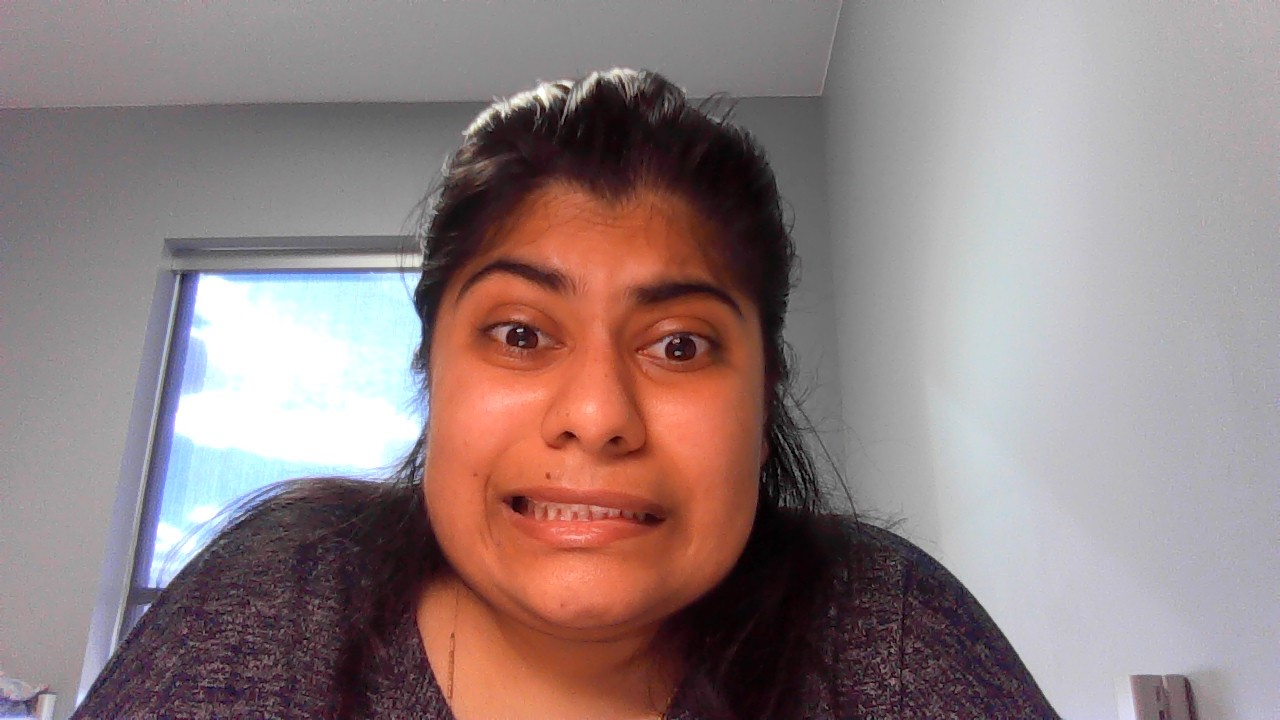



3 = happy


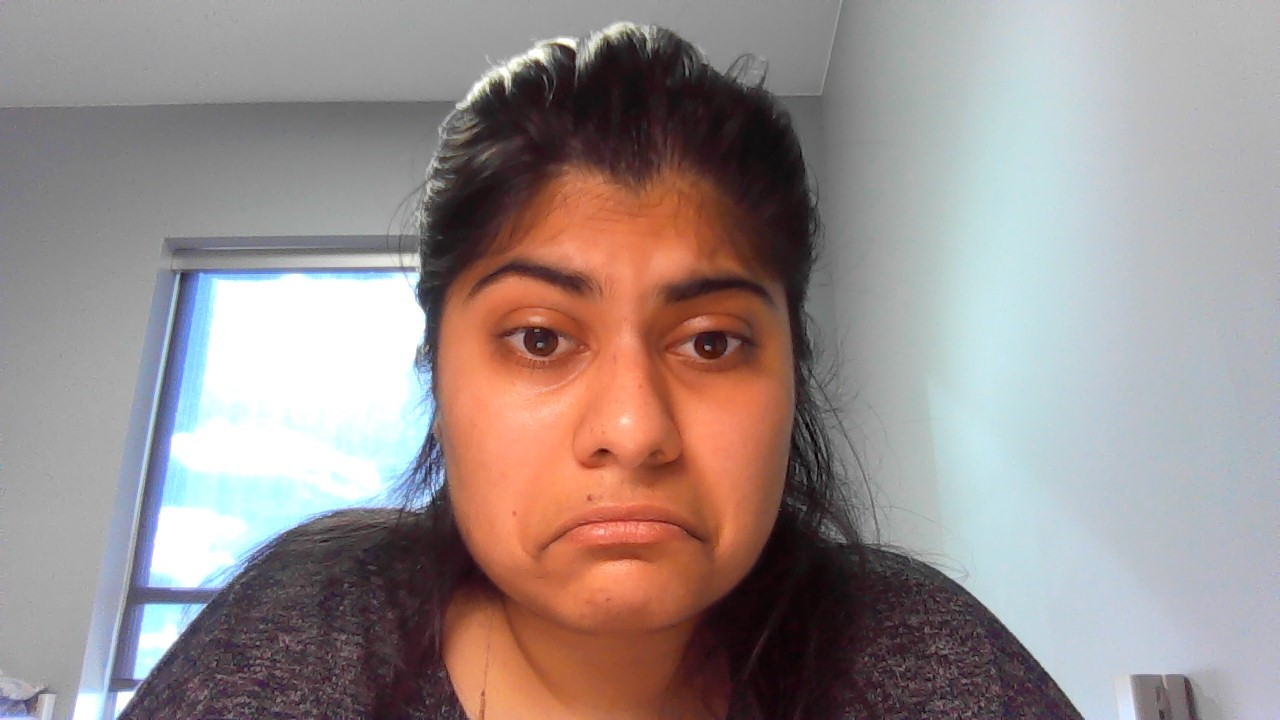



3 = happy


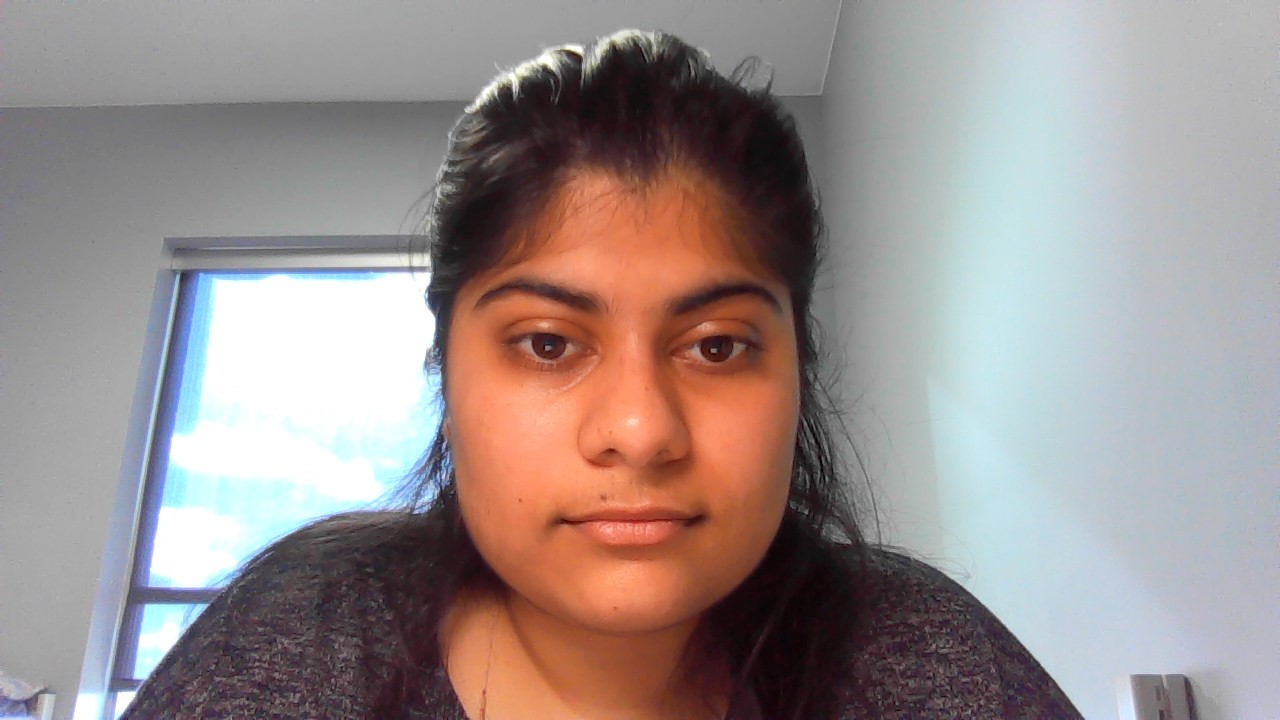



3 = happy
Saved model to disk


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#reading the csv file 
eData = pd.read_csv("fer2013.csv") #put in the csv file name here

#Spliting the Dataset
X_train = []  # for pixels
Y_train = []  # for labels
X_test = []
Y_test = []   #labels for testing 
for index, row in eData.iterrows():
    k = row['pixels'].split(" ")   #list of the pixels 
    try:
        if row['Usage'] == 'Training':              #for training
            X_train.append(np.array(k,'float32'))
            Y_train.append(row['emotion'])
        elif row['Usage'] == 'PublicTest':          # for testing from the public testing (validation happends with private testing)
            X_test.append(np.array(k,'float32'))
            Y_test.append(row['emotion'])
    except:
        print(f"error occured at index:{index} and row:{row}")           # not in the tutorial that I went through? 

#Convert Lists to Numpy arrays
X_train = np.array(X_train,'float32')
Y_train = np.array(Y_train, 'float32')
X_test = np.array(X_test,'float32')
Y_test = np.array(Y_test,'float32')

#ADJUSTING THE DATA
#Normalizing the data between 0 and 1 -- optional --
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train,axis=0)
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test,axis=0)

#Reshaping the array to be passed to the model
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

#Convert the labels to categorical ones
Y_train = np_utils.to_categorical(Y_train, num_classes=7)
Y_test  = np_utils.to_categorical(Y_test,num_classes=7)

#BUILDING THE CNN MODEL
model = Sequential()

model.add(Conv2D(input_shape=(X_train.shape[1:]),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3), padding="same",activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))                   #Droupout helps in reducing the overfitting of the model
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()       #only for printing purposes 

#Compiling the Model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

#fitting the data and evaluating the model
batch = 32             #takes data in batches of 32 and doesn't take the entire training dataset at one time. 
epoch = 30             #The number of times we pass the data to the model, in bacthes of 32. 

history = model.fit(X_train, Y_train, batch_size=batch, epochs=epoch, verbose=1, validation_data=(X_test, Y_test), shuffle=True)
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics) # ---- printing the model evaluation

TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
TYELLOW = '\033[0;43m'

#Testing the model with a few personal picutres
for i in range (1,7):
  img_directory = str(i) + '.jpg'
  img_data = image.load_img(img_directory, target_size = (48, 48))   #load the image from the directory
  img_data = image.img_to_array(img_data)                            #convert the image to a Numpy array
  img_data = tf.image.rgb_to_grayscale(img_data)

  img_data = np.expand_dims(img_data, axis = 0)
  classify = model.predict(img_data)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  max_index = np.argmax(classify[0])
  emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  emotion_prediction = emotion_detection[max_index]  
  
  if(max_index == 3 or max_index == 5):
    print(TGREEN + str(max_index) + ' = ' +  emotion_prediction)
  elif(max_index == 4 or max_index == 2 or max_index == 0):
    print(TRED + str(max_index) + ' = ' +  emotion_prediction)
  else:
    print(TYELLOW + str(max_index) + ' = ' +  emotion_prediction)

model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
  model.save_weights("model.h5")

print("Saved model to disk")

Using the model to Detect Emotions from Images

In [8]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

#Funtion that takes an image of the user
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

#Taking the image 
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo2.jpg


In [10]:
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import model_from_json
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


model = model_from_json(open("model.json", "r").read())
model.load_weights('model.h5')
face_haar_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')) 

frame = cv2.imread("photo.jpg")

gray_image= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #We pass the image, scaleFactor and minneighbour
faces_detected = face_haar_cascade.detectMultiScale(gray_image,1.32,5)

emotion_prediction = ""

#Draw Triangles around the faces detected
for (x,y,w,h) in faces_detected:
  cv2.rectangle(frame,(x,y), (x+w,y+h), (255,0,0), thickness=7)
  roi_gray=gray_image[y:y+w,x:x+h]
  roi_gray=cv2.resize(roi_gray,(48,48))
        
        #Processes the image and adjust it to pass it to the model
  image_pixels = tf.keras.preprocessing.image.img_to_array(roi_gray)
  image_pixels = np.expand_dims(image_pixels, axis = 0)
  image_pixels /= 255

        #Get the prediction of the model
  predictions = model.predict(image_pixels)
  #print(predictions)                       
  max_index = np.argmax(predictions[0])
  emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  emotion_prediction = emotion_detection[max_index]
        
  #print(emotion_prediction)              

cv2.destroyAllWindows

print("\nWhile the image is being processed, please answer the following questions: \n")

#create question lists with answers to loop through to get an idea of how the person is feeling. 
happyQuestions = ["Did you laugh wholeheartdly today? ","Do you feel content with your day? ","Did you have a worry-free mind today? ","Did you smile and feel happy today? ","Were you cheerful today? "]
sadQuestions = ["Did you cry today? ","Are you disappointed with your day? ","Were your problems unsolvable today? ","Were you more happy yesterday compared to today? ","Did something upset you today? "] 
fearQuestions = ["Were your afraid of something today? ","Are you scared about something? ","Did you encounter one of your phobias? ","Did you experience increased heart rate or shortness of breath? ","Were you anxious today? "]
disgustQuestions = ["Did something disgust you today? ","Do you feel nauseous? ","Did you have a revolting feeling today? ","Do you feel sick in any manner? ","Did you feel gross about anything today? "]
angryQuestions = ["Did you raise your tmeper today? ","Were you ticked off about something today? ","Were you enraged about something?","Did you experience a headache today? ","Do you feel the need to yell? "]
neutralQuestions = ["Do you feel indifferent about your day?","Did you not feel any emotion strongly today?","Did you get enough sleep?","Did you feel\"so-so\" today? ","Are you not able to understand your feelings? "]
surpriseQuestions = ["Were you shocked at anything today?","Were you taken aback by anything today?","Did you feel surprised today?","Did you experience increased heart rate or shortness of breath?","Did you feel a sense of curiousness today? "]

#ranomly generate a numer between 1 and 5 (should be different each time)
ans = 0
stateOB = "happy"
randints=[]

for k in range(4):
    i = random.randint(0,4)
    while randints.count(i) > 0:
        i = random.randint(0,4)
    randints.append(i)
    #for loop 5 times to get the emotion the person is feeling.
    if ans == 0:
        answer = input(happyQuestions[i])
        if answer.lower() == "no":
            ans = 1
            stateOB = "sad"
        continue
    if ans == 1:
        answer = input(sadQuestions[i])
        if answer.lower() == "no":
            ans = 2
            stateOB = "surprise"
        continue
    if ans == 2:
        answer = input(surpriseQuestions[i])
        if answer.lower() == "no":
            ans = 7
            stateOB = "fear"
        continue
    if ans == 3:
        answer = input(fearQuestions[i])
        if answer.lower() == "no":
            ans = 3
            stateOB = "disgust"
        continue
    if ans == 4:
        answer = input(disgustQuestions[i])
        if answer.lower() == "no":
            ans = 4
            stateOB = "angry"
        continue
    if ans == 5:
        answer = input(angryQuestions[i])
        if answer.lower() == "no":
            ans = 5
            stateOB = "neutral"
        continue
    if ans == 6:
        answer = input(neutralQuestions[i])
        if answer.lower() == "no":
            ans = 6
            stateOB = "neutral"
        continue

print("\nThe image indicates you are feeling " + emotion_prediction + " and your answers indicate that you are feeling " + stateOB)

#Gives tasks to do based on emotions
if emotion_prediction.lower() == stateOB.lower():
  if emotion_prediction.lower() == "happy":
    print("\nTask for you: Perform an act of kindness")
  elif emotion_prediction.lower() == "sad":
    print("\nTask for you: Plan Hangout with friends")
  elif emotion_prediction.lower() == "angry":
    print("\nTask for you: Exercise for 10-15 mins")
  elif emotion_prediction.lower() == "fear":
    print("\nTask for you: Talk to a friend")
  elif emotion_prediction.lower() == "disgust":
    print("\nTask for you: Meditate")
  elif emotion_prediction.lower() == "neutral":
    print("\nTask for you: Perform an activity you are passionate about")
  else:
    print("\nTask for you: Share your experience with a close one.")
else:
  if emotion_prediction.lower() == "happy":
    print("\nTask for you: Perform an act of kindness")
  elif emotion_prediction.lower() == "sad":
    print("\nTask for you: Plan Hangout with friends")
  elif emotion_prediction.lower() == "angry":
    print("\nTask for you: Exercise for 10-15 mins")
  elif emotion_prediction.lower() == "fear":
    print("\nTask for you: Talk to a friend")
  elif emotion_prediction.lower() == "disgust":
    print("\nTask for you: Meditate")
  elif emotion_prediction.lower() == "neutral":
    print("\nTask for you: Perform an activity you are passionate about")
  else:
    print("\nTask for you: Share your experience with a close one.")

  if stateOB.lower() == "happy":
    print(" or make a future goal for yourself")
  elif stateOB.lower() == "sad":
    print(" or perform an activity you are passionate about.")
  elif stateOB.lower() == "angry":
    print("or watch your favorite show.")
  elif stateOB.lower() == "fear":
    print(" or talk to a friend.")
  elif stateOB.lower() == "disgust":
    print(" or read something of your interest.")
  elif stateOB.lower() == "neutral":
    print(" or play board games.")
  else:
    print(" or share your experience with a close one.")


While the image is being processed, please answer the following questions: 

Do you feel content with your day? no
Did you cry today? no
Did you feel a sense of curiousness today? yes
Did you experience increased heart rate or shortness of breath?yes

The image indicates you are feeling surprise and your answers indicate that you are feeling surprise

Task for you: Share your experience with a close one.
